In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
#load in data
heart_stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
heart_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# replace yes with 1 and no with 0
heart_stroke_df["ever_married"] = heart_stroke_df["ever_married"].replace("Yes", 1)
heart_stroke_df["ever_married"] = heart_stroke_df["ever_married"].replace("No", 0)

In [5]:
#one hot encode data
genderDF = pd.get_dummies(heart_stroke_df["gender"])
workTypeDF = pd.get_dummies(heart_stroke_df["work_type"])
residenceTypeDF = pd.get_dummies(heart_stroke_df["Residence_type"])
smokingStatuesDF = pd.get_dummies(heart_stroke_df["smoking_status"])

In [6]:
#drop columns that are going to be one hot encoded
heart_stroke_df = heart_stroke_df.drop(["id", "gender", "work_type", "Residence_type", "smoking_status"], axis=1)

In [7]:
#merge the one hot encoded data together with main dataset
adjusted_df = genderDF.join([workTypeDF, residenceTypeDF, smokingStatuesDF])
heart_stroke_df = adjusted_df.join(heart_stroke_df)
heart_stroke_df

,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,...,formerly smoked,never smoked,smokes,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,67.0,0,1,1,228.69,36.6,1
1,1,0,0,0,0,0,1,0,1,0,...,0,1,0,61.0,0,0,1,202.21,NaN,1
2,0,1,0,0,0,1,0,0,1,0,...,0,1,0,80.0,0,1,1,105.92,32.5,1
3,1,0,0,0,0,1,0,0,0,1,...,0,0,1,49.0,0,0,1,171.23,34.4,1
4,1,0,0,0,0,0,1,0,1,0,...,0,1,0,79.0,1,0,1,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,0,1,0,0,0,1,...,0,1,0,80.0,1,0,1,83.75,NaN,0
5106,1,0,0,0,0,0,1,0,0,1,...,0,1,0,81.0,0,0,1,125.20,40.0,0
5107,1,0,0,0,0,0,1,0,1,0,...,0,1,0,35.0,0,0,1,82.99,30.6,0
5108,0,1,0,0,0,1,0,0,1,0,...,1,0,0,51.0,0,0,1,166.29,25.6,0


In [8]:
#check for null values
heart_stroke_df.isna().sum().sum()

201

In [9]:
#drop null rows
heart_stroke_df = heart_stroke_df.dropna()
heart_stroke_df

,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,...,formerly smoked,never smoked,smokes,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,67.0,0,1,1,228.69,36.6,1
2,0,1,0,0,0,1,0,0,1,0,...,0,1,0,80.0,0,1,1,105.92,32.5,1
3,1,0,0,0,0,1,0,0,0,1,...,0,0,1,49.0,0,0,1,171.23,34.4,1
4,1,0,0,0,0,0,1,0,1,0,...,0,1,0,79.0,1,0,1,174.12,24.0,1
5,0,1,0,0,0,1,0,0,0,1,...,1,0,0,81.0,0,0,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,0,0,0,0,0,1,1,0,...,0,0,0,13.0,0,0,0,103.08,18.6,0
5106,1,0,0,0,0,0,1,0,0,1,...,0,1,0,81.0,0,0,1,125.20,40.0,0
5107,1,0,0,0,0,0,1,0,1,0,...,0,1,0,35.0,0,0,1,82.99,30.6,0
5108,0,1,0,0,0,1,0,0,1,0,...,1,0,0,51.0,0,0,1,166.29,25.6,0


In [10]:
#reset index
heart_stroke_df = heart_stroke_df.reset_index()
heart_stroke_df = heart_stroke_df.drop(columns = "index")
heart_stroke_df

,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,...,formerly smoked,never smoked,smokes,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,67.0,0,1,1,228.69,36.6,1
1,0,1,0,0,0,1,0,0,1,0,...,0,1,0,80.0,0,1,1,105.92,32.5,1
2,1,0,0,0,0,1,0,0,0,1,...,0,0,1,49.0,0,0,1,171.23,34.4,1
3,1,0,0,0,0,0,1,0,1,0,...,0,1,0,79.0,1,0,1,174.12,24.0,1
4,0,1,0,0,0,1,0,0,0,1,...,1,0,0,81.0,0,0,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1,0,0,0,0,0,0,1,1,0,...,0,0,0,13.0,0,0,0,103.08,18.6,0
4905,1,0,0,0,0,0,1,0,0,1,...,0,1,0,81.0,0,0,1,125.20,40.0,0
4906,1,0,0,0,0,0,1,0,1,0,...,0,1,0,35.0,0,0,1,82.99,30.6,0
4907,0,1,0,0,0,1,0,0,1,0,...,1,0,0,51.0,0,0,1,166.29,25.6,0


# Different PCA

In [11]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(heart_stroke_df)
scaled_data = scaler.transform(heart_stroke_df)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [15]:
pca.explained_variance_ratio_

array([0.16447286, 0.09943924])

In [16]:
scaled_data.shape

(4909, 21)

In [17]:
x_pca.shape

(4909, 2)

0       1
1       1
2       1
3       1
4       1
       ..
4904    0
4905    0
4906    0
4907    0
4908    0
Name: stroke, Length: 4909, dtype: int64

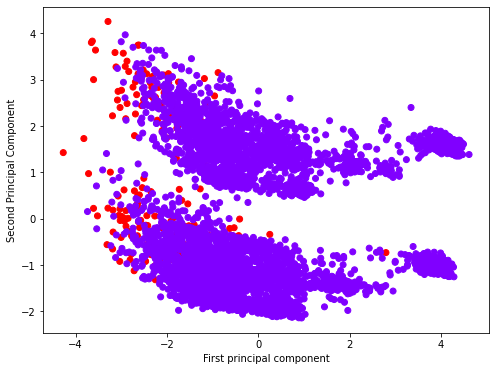

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=heart_stroke_df['stroke'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
heart_stroke_df['stroke']

In [19]:
pca.components_

array([[-0.06426254,  0.06418306,  0.0029072 , -0.07053981,  0.04235938,
        -0.16507247, -0.13839471,  0.44506163,  0.00623846, -0.00623846,
         0.36829549, -0.15252749, -0.16110094, -0.09423731, -0.44742857,
        -0.18240751, -0.12888749, -0.40058905, -0.16176799, -0.3063175 ,
        -0.12698205],
       [-0.63798861,  0.63793504,  0.00351694,  0.02899558, -0.00874285,
        -0.13320195,  0.09968259,  0.0594854 , -0.04457308,  0.04457308,
         0.05604285,  0.1475255 , -0.19762691,  0.04080793,  0.09395447,
         0.10669021,  0.18186154,  0.04574562,  0.14378311,  0.00578712,
         0.09043562]])

<AxesSubplot:>

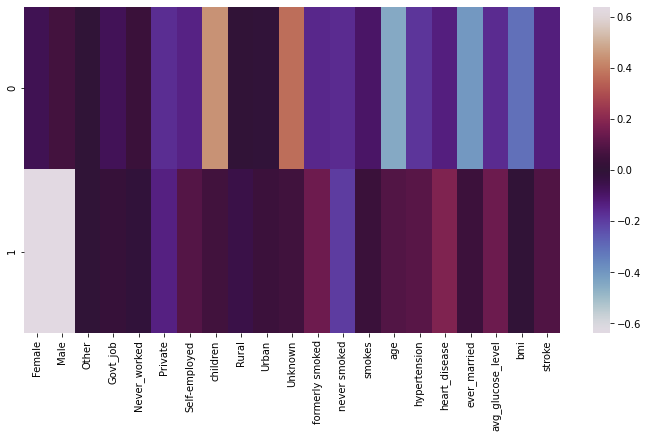

In [20]:
map= pd.DataFrame(pca.components_, columns = heart_stroke_df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

# PCA Algorithm

In [21]:
#set predictor column
strokeY = heart_stroke_df["stroke"]
strokeY = strokeY.replace(1, "stroke")
strokeY = strokeY.replace(0, "no stroke")
strokeY

0          stroke
1          stroke
2          stroke
3          stroke
4          stroke
          ...    
4904    no stroke
4905    no stroke
4906    no stroke
4907    no stroke
4908    no stroke
Name: stroke, Length: 4909, dtype: object

In [22]:
#scale the data
heart_stroke_df_scaled = StandardScaler().fit_transform(heart_stroke_df)

In [23]:
#assign features and get the covariance matrix
feat = heart_stroke_df.T
covMatrix = np.cov(feat)

In [24]:
#perform eigendecomposition
eigvalues, eigvectors = np.linalg.eig(covMatrix)

In [25]:
#view vectors
eigvectors

array([[-5.43654504e-04, -1.11012068e-03, -1.51940198e-03,
         6.83143172e-01,  3.18853045e-02, -1.60663204e-01,
         7.34933337e-02,  9.09574947e-03, -8.23036879e-03,
         1.40605294e-03, -1.24598328e-02,  1.54356157e-02,
        -1.80922155e-02,  1.32010289e-02,  7.29023604e-03,
         1.61928726e-03,  4.08220908e-01,  5.52063691e-01,
         2.40180898e-01, -4.52726652e-03,  2.59630623e-04],
       [ 5.40146643e-04,  1.10015364e-03,  1.50017235e-03,
        -6.83110427e-01, -3.21757487e-02,  1.60450795e-01,
        -7.38944409e-02, -9.82766477e-03,  9.19362930e-03,
        -1.34858506e-03,  1.30995234e-02, -1.49478751e-02,
         1.70549869e-02, -1.31464232e-02, -7.28936204e-03,
        -1.01739049e-03,  4.08273317e-01,  5.52063691e-01,
         2.40180898e-01, -4.52726652e-03,  2.59630623e-04],
       [ 3.50786099e-06,  9.96703753e-06,  1.92296281e-05,
        -3.27448901e-05,  2.90444274e-04,  2.12409048e-04,
         4.01107219e-04,  7.31915301e-04, -9.63260515e

In [26]:
#check variances to make sure they equal one and find the two that have the most impact
variances = []
for i in range(len(eigvalues)):
    variances.append(eigvalues[i] / np.sum(eigvalues))
 
print(np.sum(variances), "\n", variances)

0.9999999999999998 
 [0.7905348618482911, 0.18748541771832314, 0.0210184129391918, 0.00019307175555687857, 0.00019662165468496944, 0.00013624584512954125, 0.00011250492486162597, 7.509628613940273e-05, 6.214806266251003e-05, 5.464295914645919e-05, 4.5385626211242e-05, 3.0114336022229586e-05, 2.2233342947086472e-05, 1.6671523821512032e-05, 1.4302103668874086e-05, 2.1494257171901933e-06, 1.1964762430345646e-07, 5.925439842560988e-18, 8.013502568537988e-19, 2.0575813706527736e-20, 3.0752224859646314e-20]


In [27]:
#assign the two principal components and the target variable (stroke)
PCA1 = heart_stroke_df_scaled.dot(eigvectors.T[0])
PCA2 = heart_stroke_df_scaled.dot(eigvectors.T[1])
res = pd.DataFrame(PCA1, columns=["PCA1"])
res["PCA2"] = PCA2
res["Y"] = strokeY
res.head()

,PCA1,PCA2,Y
0,2.955842,-0.758704,stroke
1,0.298538,-1.698304,stroke
2,1.536474,-0.138503,stroke
3,1.768449,-1.298004,stroke
4,2.070656,-1.398000,stroke


/Users/garvinmo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PCA1'>

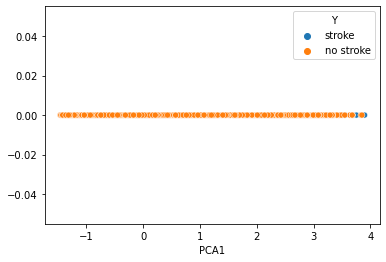

In [28]:
#graph in one dimension as a line
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(res["PCA1"], [0] * len(res), hue=res["Y"])

/Users/garvinmo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

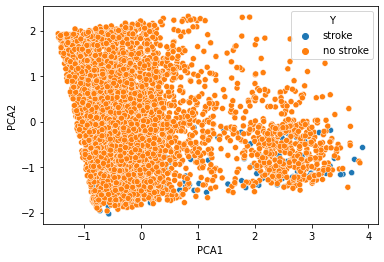

In [29]:
#graph in 2 dimensional space
sns.scatterplot(res["PCA1"], res["PCA2"], hue=res["Y"])